We should begin by importing the necessary packages and reading the training and validation data from files.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

training_data = pd.read_csv("UjiIndoorLoc/TrainingData.csv")
validation_data = pd.read_csv("UjiIndoorLoc/ValidationData.csv")

training_data = training_data.dropna().dropna(axis=1)

Offline Stage: Constract RadioMap via Training Data

In [0]:
# grid data
lon_min = min(training_data.LONGITUDE)
lon_max = max(training_data.LONGITUDE)
lat_min = min(training_data.LATITUDE)
lat_max = max(training_data.LATITUDE)

grid_anchor = [lon_min, lat_min]
grid_size = [int(lon_max-lon_min)+1, int(lat_max-lat_min)+1]

wap_column_names = training_data.filter(regex=("WAP\d*")).columns
num_of_wap = len(wap_column_names)

# create radiomap
RSSI_RM = np.full((grid_size[0], grid_size[1], num_of_wap,), np.nan)

In [0]:
def mean_relev_rssi (rssi_list):
  return np.mean(rssi_list[rssi_list < 100])
agg_list = {i: mean_relev_rssi for i in wap_column_names}

# find mean RSSI value for each WAP for each grid point
training_data["grid_pnt"] = tuple(map(lambda p: [int(p[0]-grid_anchor[0]), int(p[1]-grid_anchor[1])], zip(training_data.LONGITUDE, training_data.LATITUDE)))
training_data_gridgroups = training_data.groupby(by="grid_pnt")
training_data_agg = training_data_gridgroups.agg(agg_list)
training_data_agg = training_data_agg.dropna(how='all')

# Update RM via the training data
grid_pnt_list = list(zip(*training_data_agg.index.to_list()))
RSSI_RM[grid_pnt_list[0], grid_pnt_list[1], :] = training_data_agg[wap_column_names].to_numpy()

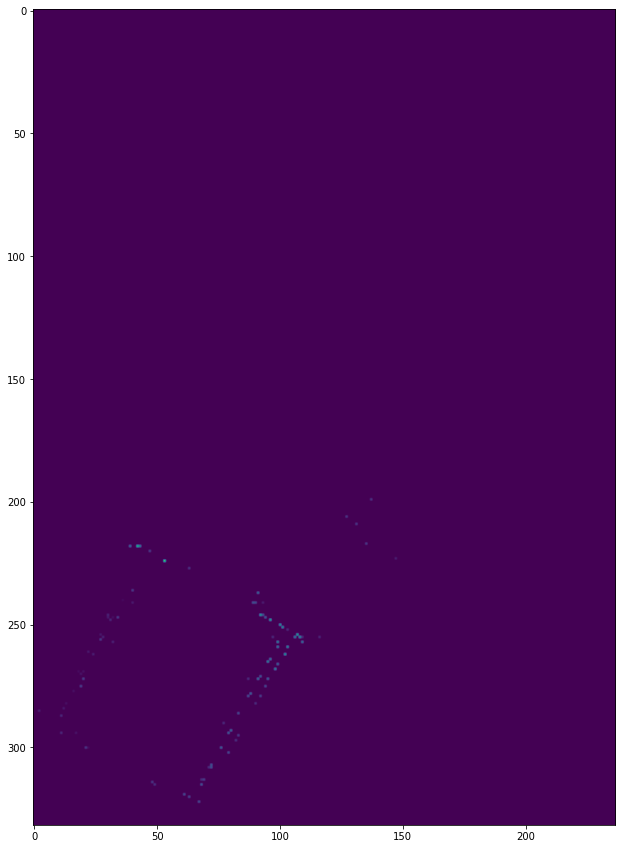

In [0]:
AA = np.copy(RSSI_RM[:,:,11])
AA[np.isnan(AA)] = -100
plt.figure(figsize=(20,15))
plt.imshow(AA, vmin=-100, vmax=0)
plt.show()